# Project: TMDb Movies Aanalysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

>● Certain columns, like ‘cast’  and ‘genres’, contain multiple values separated by pipe (|) characters.

>● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

>● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
> What is the most 10 popular genres all over the time?

> Is there a relation between a movie runtime and the vote average?

> Is there an improvement in the quality of movies from year to year?

> Who are the top 5 directors according to high revenues?

> What kinds of properties are associated with movies that have high revenues?

> Is the number of movies increase from year to year?

##### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


##### Loading Our Data

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


##### Inspecting the quality and tidiness of our data

In [8]:
#checking the shape of the data
df.shape

(10866, 21)

In [111]:
#checking null or missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
#checking data types and column nature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [110]:
#checking for duplicates
df.duplicated().sum()

1

In [7]:
#let have an overview of our data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
>We will proceed to clean our data by:

>Clean null values

>Drop any duplicate

>Drop unecessary columns in our analysis

>Check outliers


 

In [131]:
# Dropping columns that aren't needed in the analysis
df_new=df.copy() #making a copy of our data
df_new = df_new.drop(columns=['id','imdb_id','cast','original_title', 'homepage','tagline','keywords','overview','release_date'])

In [132]:
#drop null values
df.dropna(inplace=True)

In [133]:
#droping any duplicated values
df_new.drop_duplicates(inplace=True)

In [134]:
#Make the condition of zero outliers
zero_outliers = (df['revenue_adj'] == 0) & (df['budget_adj'] == 0) 

In [135]:
#Apply the condition on the data and get the shape of this data (about 50% of data in these columns are zeroes)
df[zero_outliers].shape

(387, 21)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1;What is the most 10 popular genres all over the time?

##### Method 1: By Groupby function

In [136]:
# Lets use a groupby to check popularity of genre
genre_all_time = df_new.groupby(['genres'])['popularity'].sum().sort_values(ascending=False)
genre_all_time.head(10)

genres
Drama                                        107.406988
Comedy                                       100.448838
Action|Adventure|Science Fiction|Thriller     65.384732
Adventure|Fantasy|Action                      52.432370
Drama|Romance                                 48.952658
Adventure|Action|Thriller                     44.114381
Action|Adventure|Science Fiction              40.311399
Adventure|Action|Science Fiction              39.440355
Comedy|Drama|Romance                          38.236105
Comedy|Romance                                36.541258
Name: popularity, dtype: float64

##### Method 2: By Visualization

In [151]:
#lets filter the data
top_10 = df_new.groupby(['genres'])['popularity'].sum().sort_values(ascending=False)[:10]

D:\UserData\ngwasi_c\AppData\Local\Temp/ipykernel_20196/192869177.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


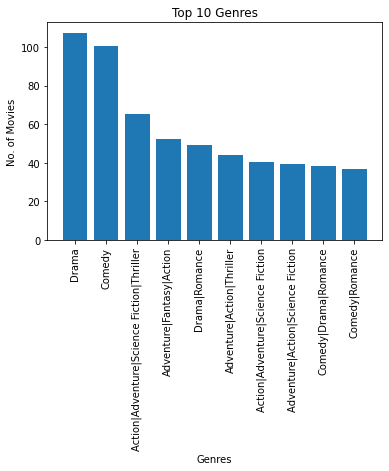

In [152]:
#Plotting
x = top_10.index
y = top_10
fig, ax = plt.subplots()

#set the plot and ticks properties
ax.set_xticklabels(x,rotation=90)
ax.set_title("Top 10 Genres")
ax.set_xlabel('Genres')
ax.set_ylabel('No. of Movies')

ax.bar(x, y);

### Research Question 2:  What kinds of properties are associated with movies that have high revenues?

##### 1. Popularity and Revenue

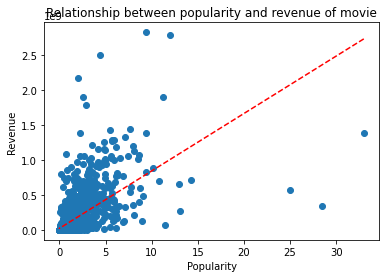

In [139]:
#preparing data
popularity = df_new['popularity']
revenue = df_new['revenue_adj']

#Plotting

fig, ax = plt.subplots()

#set the plot properties
ax.set_title('Relationship between popularity and revenue of movie')
ax.set_xlabel('Popularity')
ax.set_ylabel('Revenue')

ax.scatter(popularity, revenue);

#Plotting the trendline to show the correlation
z = np.polyfit(popularity, revenue, 1)
p = np.poly1d(z)
ax.plot(popularity,p(popularity),"r--");

##### 2. Budget and Revenue

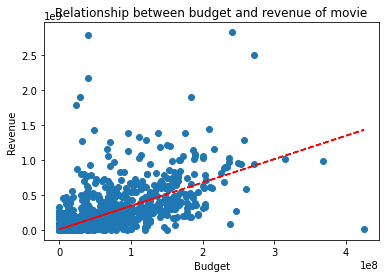

In [140]:
#preparing data
budget = df_new['budget_adj']
revenue = df_new['revenue_adj']

#Plotting

fig, ax = plt.subplots()

#set the plot properties
ax.set_title('Relationship between budget and revenue of movie')
ax.set_xlabel('Budget')
ax.set_ylabel('Revenue')

ax.scatter(budget, revenue);

#Plotting the trendline to show the correlation
z = np.polyfit(budget, revenue, 1)
p = np.poly1d(z)
ax.plot(budget,p(budget),"r--")

##### 3. Voting Count and Revenue

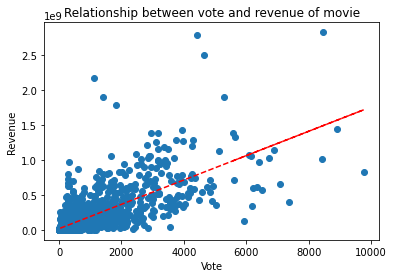

In [141]:
#preparing data
vote = df_new['vote_count']
revenue = df_new['revenue_adj']

#Plotting

fig, ax = plt.subplots()

#set the plot properties
ax.set_title('Relationship between vote and revenue of movie')
ax.set_xlabel('Vote')
ax.set_ylabel('Revenue')

ax.scatter(vote, revenue);

#Plotting the trendline to show the correlation
z = np.polyfit(vote, revenue, 1)
p = np.poly1d(z)
ax.plot(vote,p(vote),"r--")

### Research Question 3 : Who are the top earning directors?


##### Method 1: Groupby Function

In [143]:
# Lets use a groupby to check popularity of genre
top_earners = df_new.groupby(['director'])['revenue_adj'].sum().sort_values(ascending=False)
top_earners.head(10)

director
Steven Spielberg     9.623372e+09
Peter Jackson        6.364545e+09
George Lucas         5.749136e+09
James Cameron        5.518233e+09
David Yates          4.177455e+09
Christopher Nolan    4.026410e+09
Sam Raimi            3.390581e+09
Gore Verbinski       3.261547e+09
Michael Bay          3.174484e+09
Francis Lawrence     3.067993e+09
Name: revenue_adj, dtype: float64

##### Method 2: Visualization

In [149]:
#lets filter the data
top_directors = df_new.groupby(['director'])['revenue_adj'].sum().sort_values(ascending=False)[:10]

D:\UserData\ngwasi_c\AppData\Local\Temp/ipykernel_20196/3713271438.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


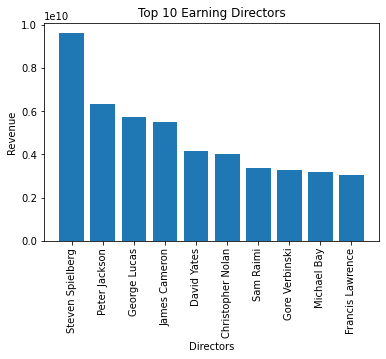

In [150]:
#Plotting
x = top_directors.index
y = top_directors
fig, ax = plt.subplots()

#set the plot and ticks properties
ax.set_xticklabels(x,rotation=90)
ax.set_title("Top 10 Earning Directors")
ax.set_xlabel('Directors')
ax.set_ylabel('Revenue')

ax.bar(x, y);

<a id='conclusions'></a>
## Conclusions

> 1. The most popular genres of all times are Drama & Comedy 

> 2. Popular movies with high budget, good voting produce high revenue

> 3. The most earning director of all times is Steven Spielberg



### Limitations

>This datatset has a lot of unneeded colums which needs to be removed for this analysis

>This datatset has a lot of missing values which need to decide what to do with it

>The cast column and some other columns has strings and seperated with '|' character which limited our analysis until it not solved

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])